In [140]:
# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Display all of the columns
pd.set_option('display.max_columns', None)

In [141]:
# Read the CSV file into a Pandas DataFrame
credit_df = pd.read_csv(
    Path('Resources/cleaned_data_v2.csv')
)
credit_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,3,7,11.27,4,_,809.98,26.82,22.1,No,49.57,80.42,High_spent_Small_value_payments,312.49,Good
1,23,Scientist,19114.12,3,4,3,4,5,4,6.27,4,Good,809.98,31.38,22.3,No,49.57,199.46,Low_spent_Small_value_payments,223.45,Good
2,23,Scientist,19114.12,3,4,3,4,3,8,11.27,4,Good,809.98,22.54,22.6,No,49.57,178.34,Low_spent_Small_value_payments,244.57,Good
3,28,_______,34847.84,2,4,6,1,3,4,5.42,2,Good,605.03,24.46,26.6,No,18.82,104.29,Low_spent_Small_value_payments,470.69,Standard
4,28,Teacher,34847.84,2,4,6,1,7,1,7.42,2,Good,605.03,38.55,26.7,No,18.82,40.39,High_spent_Large_value_payments,484.59,Good


In [142]:
# Split target column from dataset
y = credit_df['Credit_Score']
columns_to_drop = ['Credit_Score', 'Occupation', 'Num_of_Loan', 'Credit_Utilization_Ratio', 'Credit_History_Age',
                  'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Credit_Mix']
X = credit_df.drop(columns=columns_to_drop)

In [143]:
# Preview the data
X[:5]

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Monthly_Balance
0,23,19114.12,3,4,3,3,7,11.27,4,809.98,312.49
1,23,19114.12,3,4,3,5,4,6.27,4,809.98,223.45
2,23,19114.12,3,4,3,3,8,11.27,4,809.98,244.57
3,28,34847.84,2,4,6,3,4,5.42,2,605.03,470.69
4,28,34847.84,2,4,6,7,1,7.42,2,605.03,484.59


In [144]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [145]:
# Preview the data
X.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Monthly_Balance
0,23,19114.12,3,4,3,3,7,11.27,4,809.98,312.49
1,23,19114.12,3,4,3,5,4,6.27,4,809.98,223.45
2,23,19114.12,3,4,3,3,8,11.27,4,809.98,244.57
3,28,34847.84,2,4,6,3,4,5.42,2,605.03,470.69
4,28,34847.84,2,4,6,7,1,7.42,2,605.03,484.59


In [146]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.025, random_state=1)

In [147]:
X_train.shape

(48284, 11)

In [148]:
X_test.shape

(1239, 11)

In [149]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [150]:
model = KNeighborsClassifier(n_neighbors=6)

In [151]:
# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=6)

In [152]:
# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array(['Standard', 'Good', 'Poor', ..., 'Standard', 'Standard',
       'Standard'], dtype=object)

In [153]:
# Print confusion matrix
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[145  11  71]
 [  3 302  97]
 [ 69  54 487]]


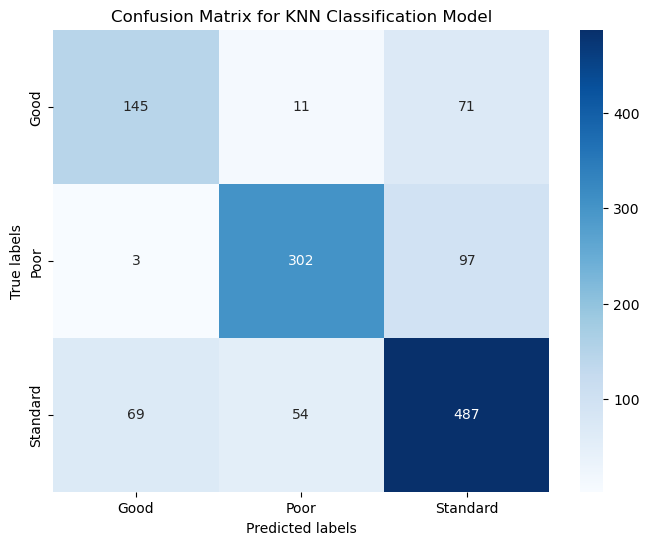

In [154]:
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['Good', 'Poor', 'Standard'], yticklabels=['Good', 'Poor', 'Standard'], fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for KNN Classification Model')
plt.show()

In [155]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

        Good       0.67      0.64      0.65       227
        Poor       0.82      0.75      0.79       402
    Standard       0.74      0.80      0.77       610

    accuracy                           0.75      1239
   macro avg       0.74      0.73      0.74      1239
weighted avg       0.76      0.75      0.75      1239



In [156]:
#Check performance using accuracy
print(accuracy_score(y_test, y_pred))

0.7538337368845843


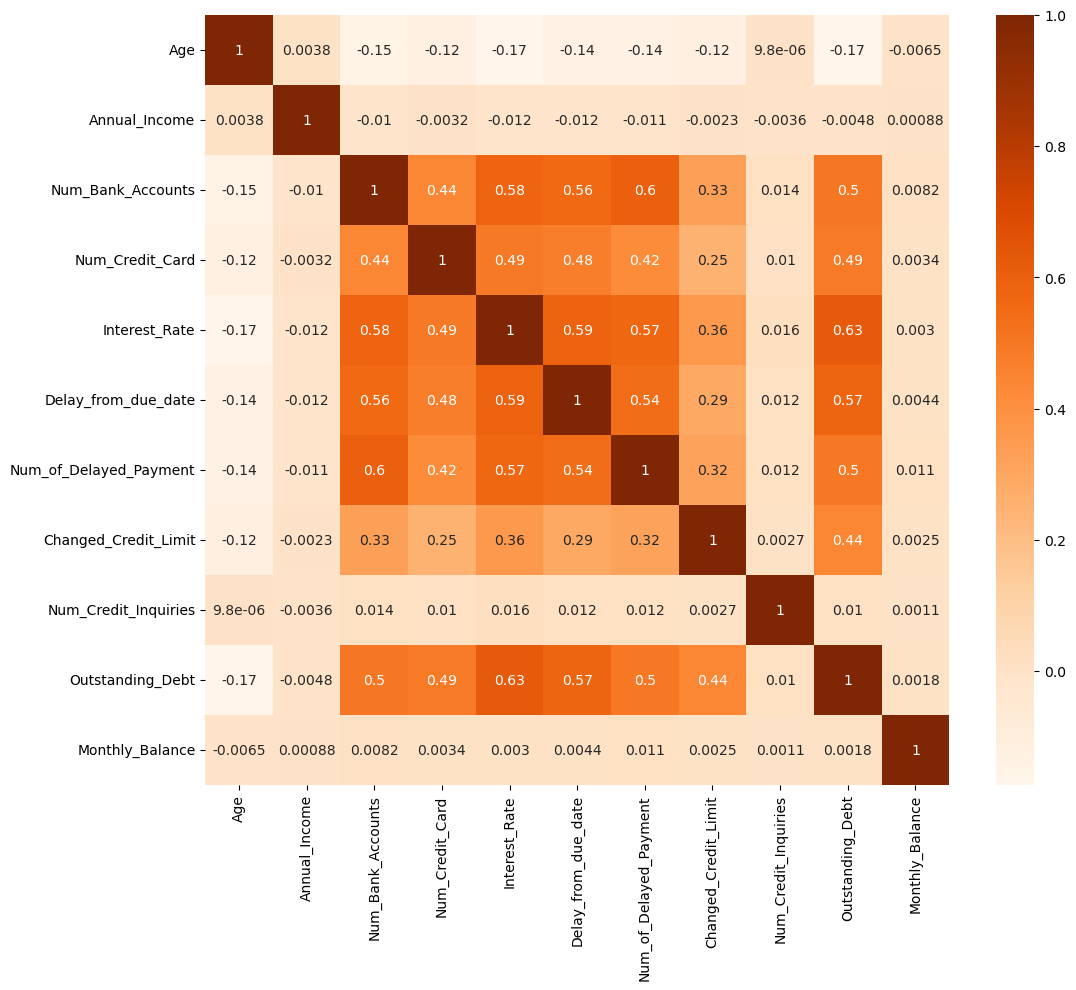

In [157]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Oranges)
plt.show()


In [158]:
# Read the CSV file into a Pandas DataFrame
test_df = pd.read_csv(
    Path('Resources/cleaned_data_test.csv')
)
test_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,28,_______,34847.84,2,4,6,1,3,1,5.42,5,Good,605.03,25.93,27.2,No,18.82,39.68,High_spent_Large_value_payments,485.30
1,28,Teacher,34847.84,2,4,6,1,3,3,5.42,5,Good,605.03,30.12,27.3,No,18.82,251.63,Low_spent_Large_value_payments,303.36
2,35,Engineer,143162.64,1,5,8,3,6,3,2.10,3,Good,1303.01,35.69,18.5,No,246.99,453.62,Low_spent_Large_value_payments,788.11
3,34,Lawyer,131313.40,0,1,8,2,0,2,9.34,4,Good,352.16,31.03,31.3,No,911.22,966.07,Low_spent_Large_value_payments,290.56
4,34,Lawyer,131313.40,0,1,8,2,0,1,9.34,4,Good,352.16,26.07,31.4,NM,911.22,1141.22,Low_spent_Medium_value_payments,125.41


In [159]:
columns_to_drop = ['Occupation', 'Num_of_Loan', 'Credit_Utilization_Ratio', 'Credit_History_Age',
                  'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Credit_Mix']
X2 = test_df.drop(columns=columns_to_drop)

In [160]:
# Encode the categorical variables using get_dummies
X2 = pd.get_dummies(X2)

In [161]:
# Preview the data
X2.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Monthly_Balance
0,28,34847.84,2,4,6,3,1,5.42,5,605.03,485.30
1,28,34847.84,2,4,6,3,3,5.42,5,605.03,303.36
2,35,143162.64,1,5,8,6,3,2.10,3,1303.01,788.11
3,34,131313.40,0,1,8,0,2,9.34,4,352.16,290.56
4,34,131313.40,0,1,8,0,1,9.34,4,352.16,125.41


In [162]:
X2.shape

(2317, 11)

In [163]:
# Re-fit the scaler on the original dataset
X_scaler.fit(X_train, y_train)
# Transform the new dataset X2 
X2_scaled = X_scaler.transform(X2)

In [164]:
len(X2_scaled)

2317

In [165]:
# predict on the 2nd dataset X2
y_pred_2 = model.predict(X2_scaled)


In [166]:
# Review the predictions
y_pred_2

array(['Good', 'Good', 'Good', ..., 'Good', 'Good', 'Good'], dtype=object)

In [167]:
y_test.value_counts()

Credit_Score
Standard    655
Poor        367
Good        217
Name: count, dtype: int64

In [168]:
from collections import Counter
distribution = Counter(y_pred_2)
print(distribution)

Counter({'Good': 1369, 'Standard': 635, 'Poor': 313})


In [169]:
len(y_pred_2)

2317

In [170]:
# Calculate value counts for y_test
value_counts = np.unique(y_test, return_counts=True)

# Calculate percentages
total_samples = len(y_test)
percentages = value_counts[1] / total_samples * 100

# Sort the percentages in ascending order
sorted_percentages = sorted(zip(*value_counts, percentages), key=lambda x: x[1])

# Unzip the sorted percentages
values, counts, percentages = zip(*sorted_percentages)

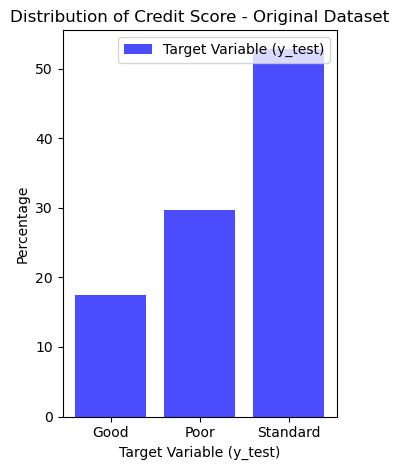

In [171]:
plt.subplot(1, 2, 1)
plt.bar(values, percentages, color='blue', alpha=0.7, label='Target Variable (y_test)')
plt.xlabel('Target Variable (y_test)')
plt.ylabel('Percentage')
plt.title('Distribution of Credit Score - Original Dataset')
plt.legend()
plt.tight_layout()
plt.show()

In [172]:
# Calculate value counts for y_test
value_counts = np.unique(y_pred_2, return_counts=True)

# Calculate percentages
total_samples = len(y_pred_2)
percentages = value_counts[1] / total_samples * 100

# Sort the percentages in ascending order
sorted_percentages = sorted(zip(*value_counts, percentages), key=lambda x: x[1])

# Unzip the sorted percentages
values, counts, percentages = zip(*sorted_percentages)

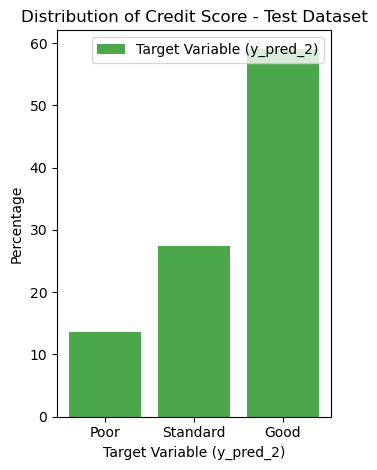

In [173]:
plt.subplot(1, 2, 2)
plt.bar(values, percentages, color='green', alpha=0.7, label='Target Variable (y_pred_2)')
plt.xlabel('Target Variable (y_pred_2)')
plt.ylabel('Percentage')
plt.title('Distribution of Credit Score - Test Dataset')
plt.legend()
plt.tight_layout()
plt.show()

In [174]:
# Calculate class distribution percentages for y_test
y_test_class_distribution = (pd.Series(y_test).value_counts(normalize=True) * 100).round()

# Calculate class distribution percentages for the new predictions
predictions_class_distribution = (pd.Series(y_pred_2).value_counts(normalize=True) * 100).round()

# Create a DataFrame to display the class distribution percentages in a grid
df = pd.DataFrame({
    'y_test (%)': y_test_class_distribution,
    'Predictions on New Test Data (%)': predictions_class_distribution
}).fillna(0)  # Fill NaN values with 0

print(df)

          y_test (%)  Predictions on New Test Data (%)
Good            18.0                              59.0
Poor            30.0                              14.0
Standard        53.0                              27.0
